In [1]:
!git clone https://github.com/Mamiglia/SOS_HW1
!mv ./SOS_HW1/* ./

Cloning into 'SOS_HW1'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 76 (delta 35), reused 58 (delta 20), pack-reused 0
Receiving objects: 100% (76/76), 63.38 KiB | 6.34 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [18]:
from utils import differential_evolution_key, watermarked_key
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using cache found in /root/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


In [20]:
res = differential_evolution_key(None, None)
res

Files already downloaded and verified
Files already downloaded and verified


Using cache found in /root/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master
100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


0: best_key= [[149 169  53  29  15]
 [ 23 113  63  29  11]
 [131  92 227  17  11]
 [ 75 190 101  24   1]
 [200  88 106   9   7]
 [ 84 116 226  16   2]
 [162 144 101  28   0]
 [ 80 205  30   9  13]
 [145  86 228   7  28]
 [163 179 230  28  15]
 [  3 137   9   3  20]
 [181 155 217  27   5]
 [134 131 181   8  23]
 [ 80 226 197  15   5]
 [246 192 213   4   7]
 [176  91  61  17   8]
 [ 77 183 216  11   2]
 [233   0 172  12   1]
 [ 82  30 101  18   6]
 [ 22 230 213  15  12]
 [129 157 232  25  20]
 [195 232  23  14   8]
 [113  29 187  28   1]
 [153  21 212  17  19]
 [ 32 227 182   5  28]
 [152  23 142  15   2]
 [236 201 111  27   6]
 [ 71 217  87  21  20]
 [ 68  96  93  10   8]
 [122 199 193  24  27]
 [245 128 247  25  23]
 [ 93  87  63  20  15]
 [ 20 109 122   4  29]
 [131 129 146   4   7]
 [189  98  53   9  20]
 [130  96  21  14  16]
 [ 67  88 187  12   3]
 [ 96 127  20   4  25]
 [225 118  22  12  29]
 [ 96 249 144  19  20]
 [ 99 225  88  23  18]
 [  5 113 237  27  24]
 [ 20 219 197   1  15

[[array([[149, 169,  53,  29,  15],
         [ 23, 113,  63,  29,  11],
         [131,  92, 227,  17,  11],
         [ 75, 190, 101,  24,   1],
         [200,  88, 106,   9,   7],
         [ 84, 116, 226,  16,   2],
         [162, 144, 101,  28,   0],
         [ 80, 205,  30,   9,  13],
         [145,  86, 228,   7,  28],
         [163, 179, 230,  28,  15],
         [  3, 137,   9,   3,  20],
         [181, 155, 217,  27,   5],
         [134, 131, 181,   8,  23],
         [ 80, 226, 197,  15,   5],
         [246, 192, 213,   4,   7],
         [176,  91,  61,  17,   8],
         [ 77, 183, 216,  11,   2],
         [233,   0, 172,  12,   1],
         [ 82,  30, 101,  18,   6],
         [ 22, 230, 213,  15,  12],
         [129, 157, 232,  25,  20],
         [195, 232,  23,  14,   8],
         [113,  29, 187,  28,   1],
         [153,  21, 212,  17,  19],
         [ 32, 227, 182,   5,  28],
         [152,  23, 142,  15,   2],
         [236, 201, 111,  27,   6],
         [ 71, 217,  87,  21

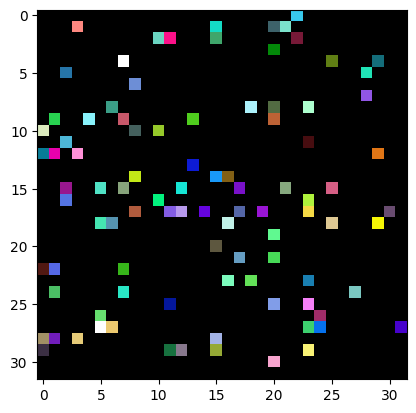

In [22]:
import numpy as np
import matplotlib.pyplot as plt

key = res[-1][0]

m = watermarked_key(np.zeros((32,32,3), dtype=int), key)
plt.imshow(m)
plt.show()